In [1]:
# Specify inline plots for notebook
%matplotlib inline
from matplotlib.font_manager import FontProperties

# Libraries -- overkill for the time being
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import seaborn as sns
import numpy as np
import os, datetime

# Set working dir -- LANDIS outputs are stored on the NAS
wrkDir = 'Z:/Dan K/DinkeyCreek/LANDIS_RUNS/ECOREGION_PARAM/'

### Sim 1

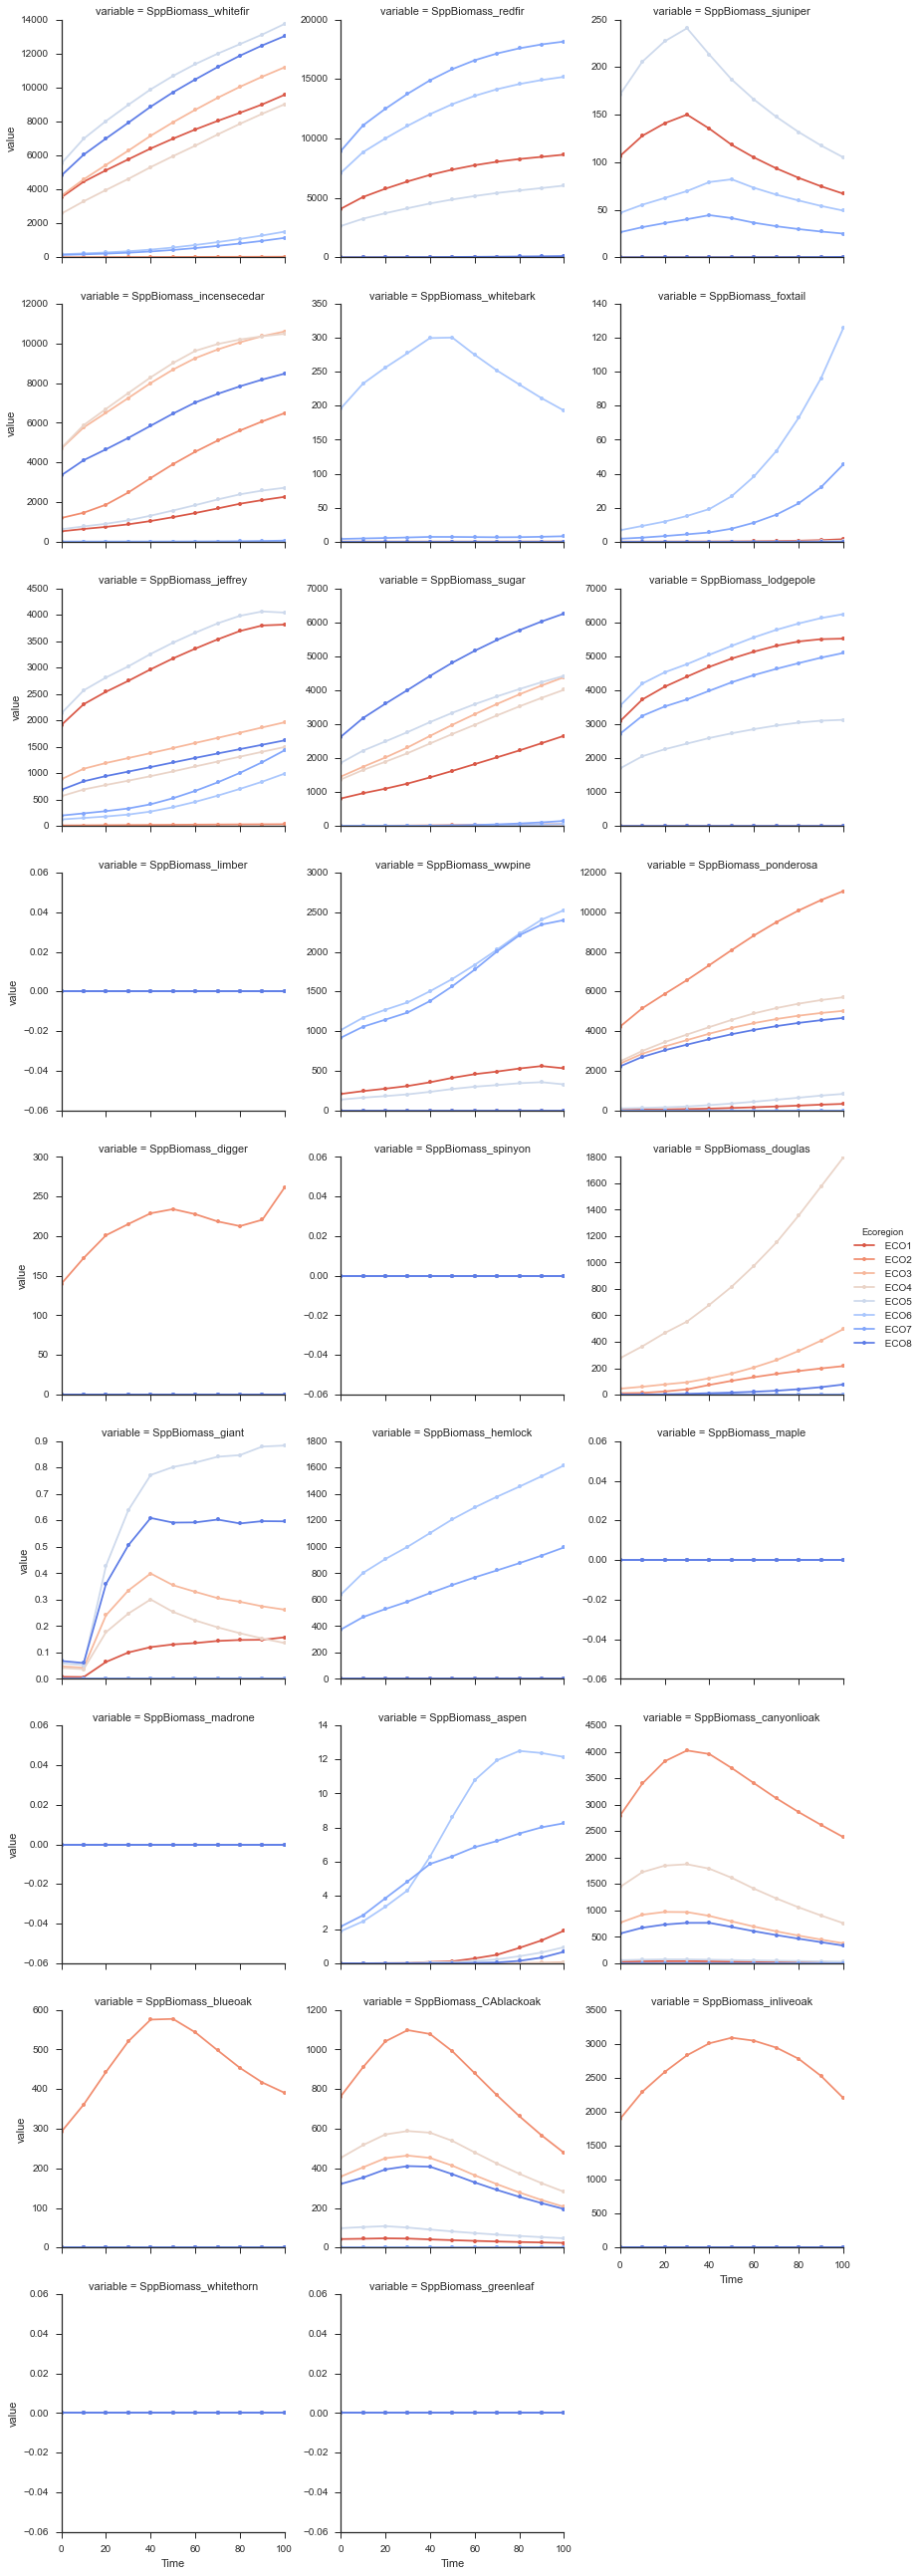

In [90]:
# Four simulations, with various initial ecoregion parameters
# Each simulation sets identical parameters across all ecoregions
# Each simulations increases 

#sim1bio = pd.read_csv(wrkDir + 'param_set_1/output/DinkeyScenario/replicate1/spp-biomass-log.csv')

# Remove the frass columns
del sim1bio['NumSites']
del sim1bio['EcoregionIndex']
del sim1bio['Unnamed: 30']

# Melt by time and ecoregion (make a biomass column)
sim1biomass = pd.melt(sim1bio, id_vars=['Time','Ecoregion'])

# Oddly enough, LANDIS outputs bad data as ' NaN' with the preceeding space
# Take care of that and correct the column dtype for plotting
sim1biomass[sim1biomass.value == ' NaN'] = np.nan
sim1biomass = sim1biomass.dropna()
sim1biomass.value = sim1biomass.value.astype(float)

# ggplot style facets to look at biomass over time as a function of ecoregion
# and species
sns.set(style="ticks")
grid = sns.FacetGrid(sim1biomass, col="variable", hue="Ecoregion", 
                     col_wrap=3, size=4, palette = 'coolwarm_r', sharey = False)
grid.map(plt.plot, "Time", "value", marker="o", ms=4)
grid.add_legend();





### Sim 2

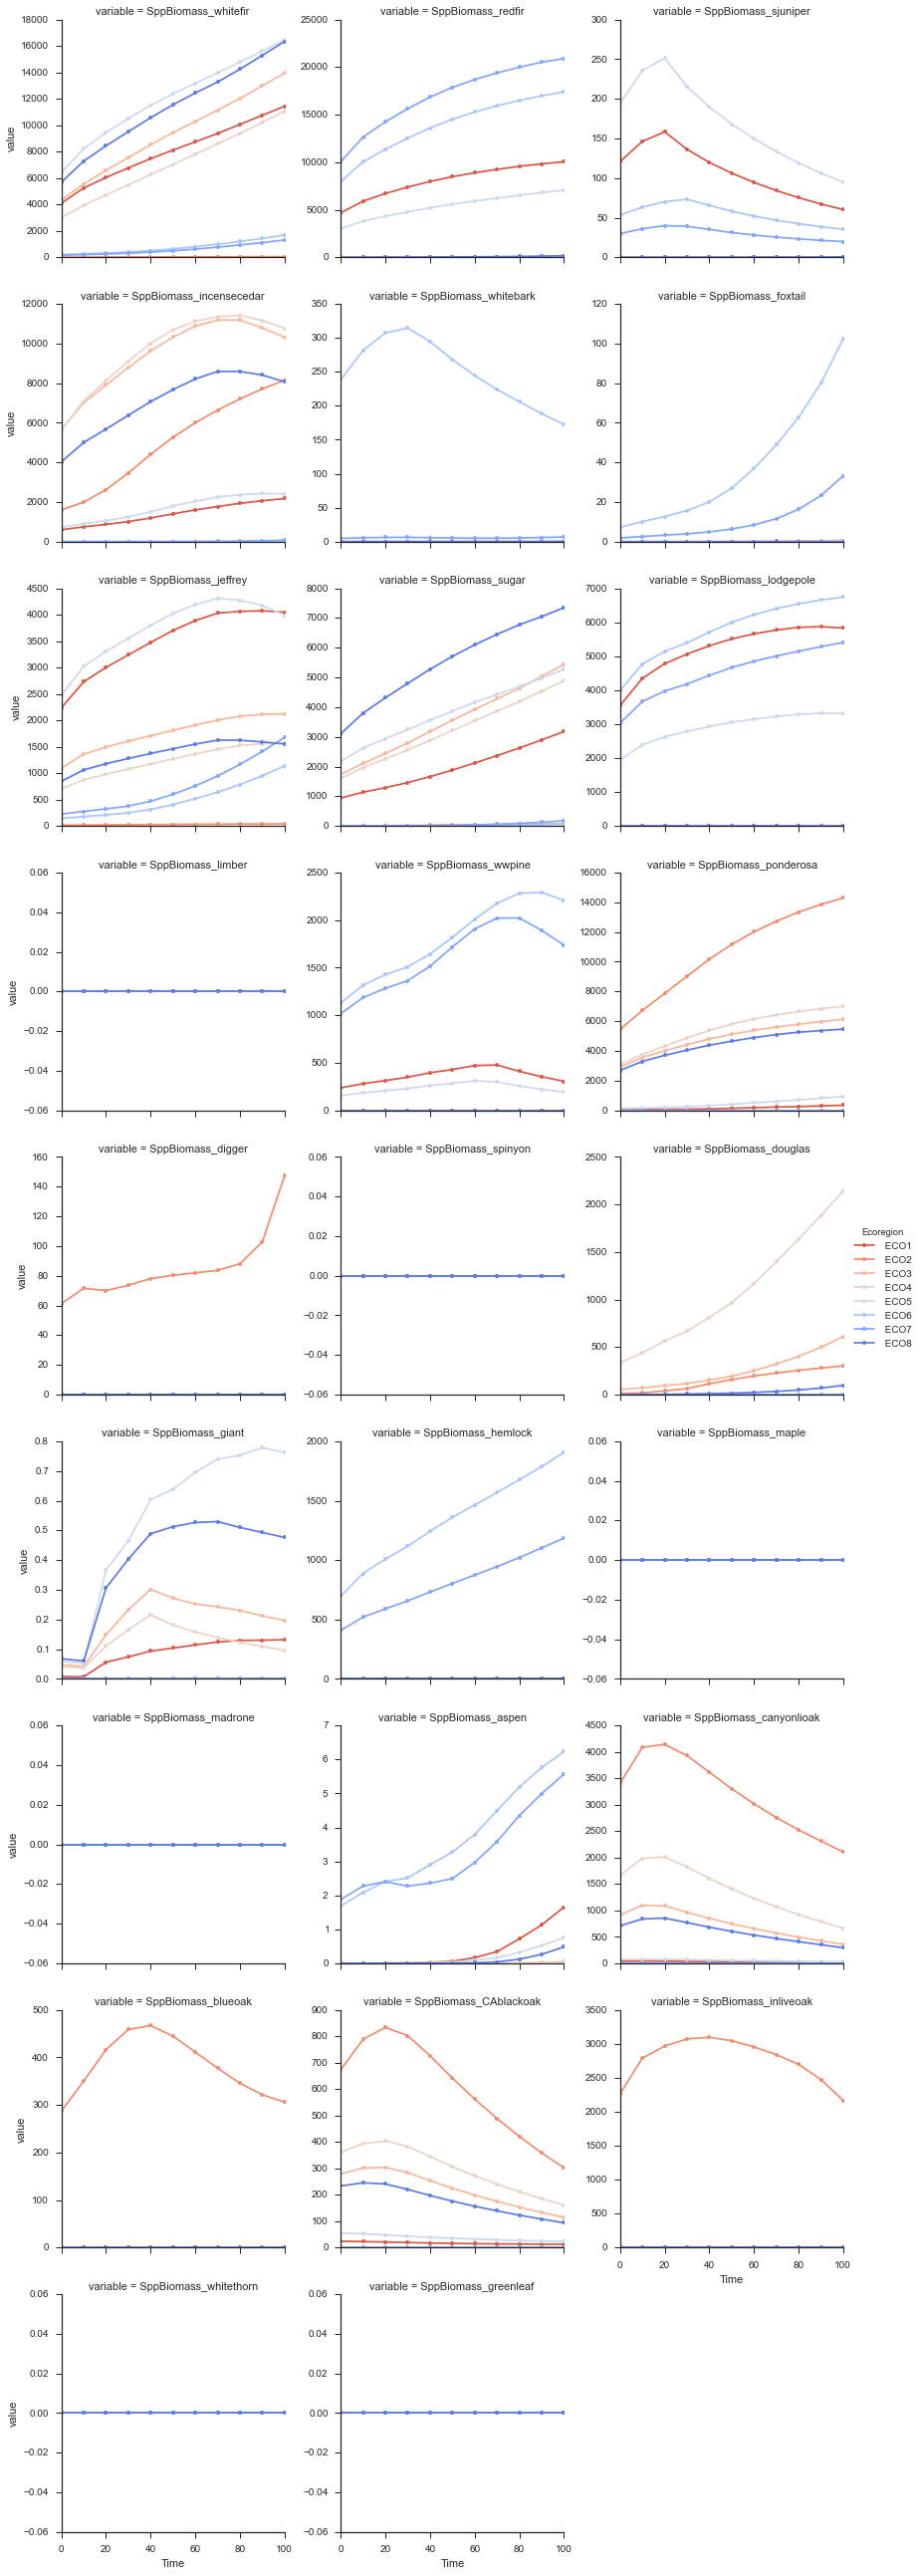

In [98]:
# Four simulations, with various initial ecoregion parameters
# Each simulation sets identical parameters across all ecoregions
# Each simulations increases 

#sim2bio = pd.read_csv(wrkDir + 'param_set_2/output/DinkeyScenario/replicate1/spp-biomass-log.csv')

# Remove the frass columns
del sim2bio['NumSites']
del sim2bio['EcoregionIndex']
del sim2bio['Unnamed: 30']

# Melt by time and ecoregion (make a biomass column)
sim2biomass = pd.melt(sim2bio, id_vars=['Time','Ecoregion'])

# Oddly enough, LANDIS outputs bad data as ' NaN' with the preceeding space
# Take care of that and correct the column dtype for plotting
sim2biomass[sim2biomass.value == ' NaN'] = np.nan
sim2biomass = sim2biomass.dropna()
sim2biomass.value = sim2biomass.value.astype(float)

# ggplot style facets to look at biomass over time as a function of ecoregion
# and species
sns.set(style="ticks")
grid = sns.FacetGrid(sim2biomass, col="variable", hue="Ecoregion", 
                     col_wrap=3, size=4, palette = 'coolwarm_r', sharey = False)
grid.map(plt.plot, "Time", "value", marker="o", ms=4)
grid.add_legend();


### Sim 3

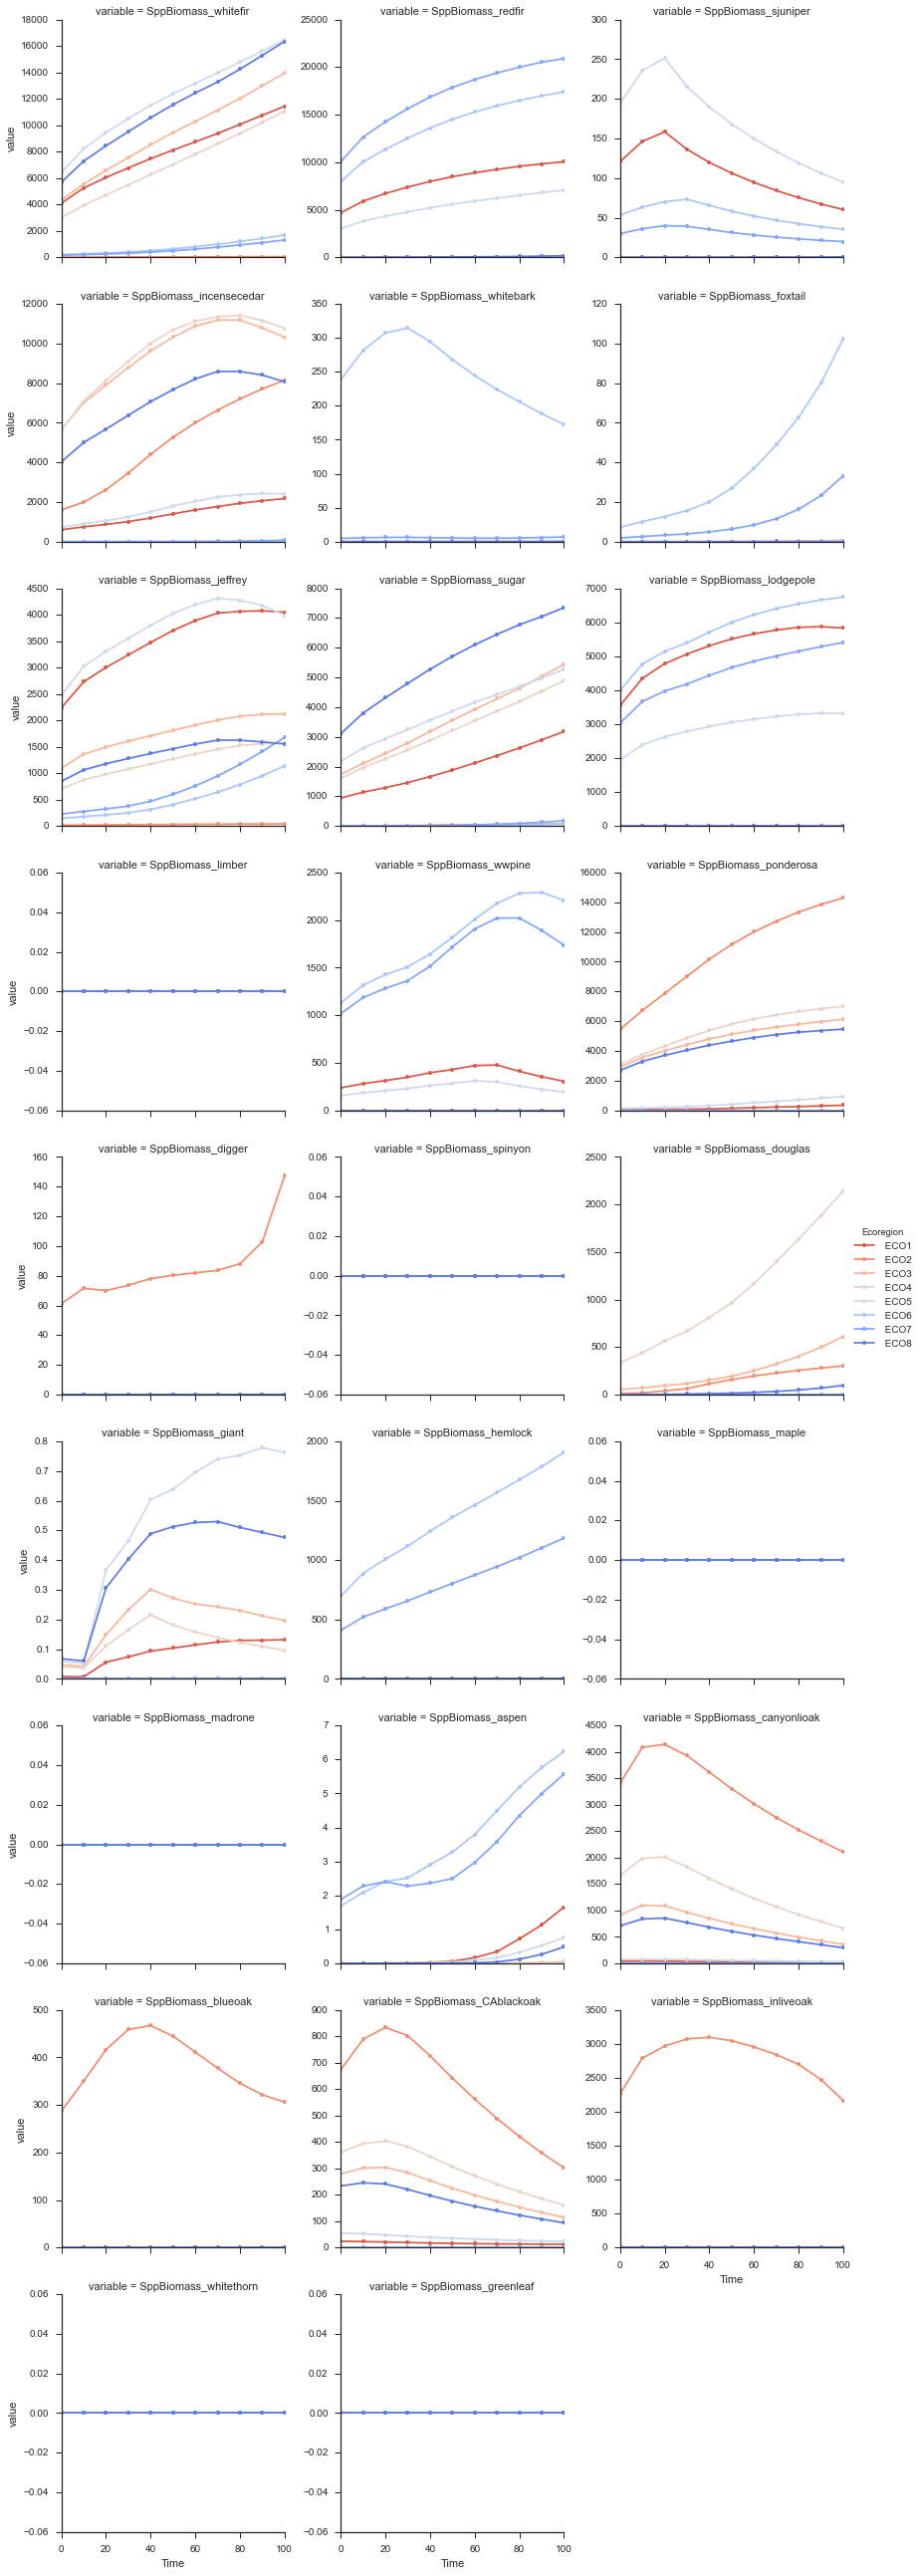

In [101]:
# Four simulations, with various initial ecoregion parameters
# Each simulation sets identical parameters across all ecoregions
# Each simulations increases 

#sim3bio = pd.read_csv(wrkDir + 'param_set_3/output/DinkeyScenario/replicate1/spp-biomass-log.csv')

# Remove the frass columns
del sim3bio['NumSites']
del sim3bio['EcoregionIndex']
del sim3bio['Unnamed: 30']

# Melt by time and ecoregion (make a biomass column)
sim3biomass = pd.melt(sim3bio, id_vars=['Time','Ecoregion'])

# Oddly enough, LANDIS outputs bad data as ' NaN' with the preceeding space
# Take care of that and correct the column dtype for plotting
sim3biomass[sim3biomass.value == ' NaN'] = np.nan
sim3biomass = sim3biomass.dropna()
sim3biomass.value = sim3biomass.value.astype(float)

# ggplot style facets to look at biomass over time as a function of ecoregion
# and species
sns.set(style="ticks")
grid = sns.FacetGrid(sim3biomass, col="variable", hue="Ecoregion", 
                     col_wrap=3, size=4, palette = 'coolwarm_r', sharey = False)
grid.map(plt.plot, "Time", "value", marker="o", ms=4)
grid.add_legend();


### Sim 4

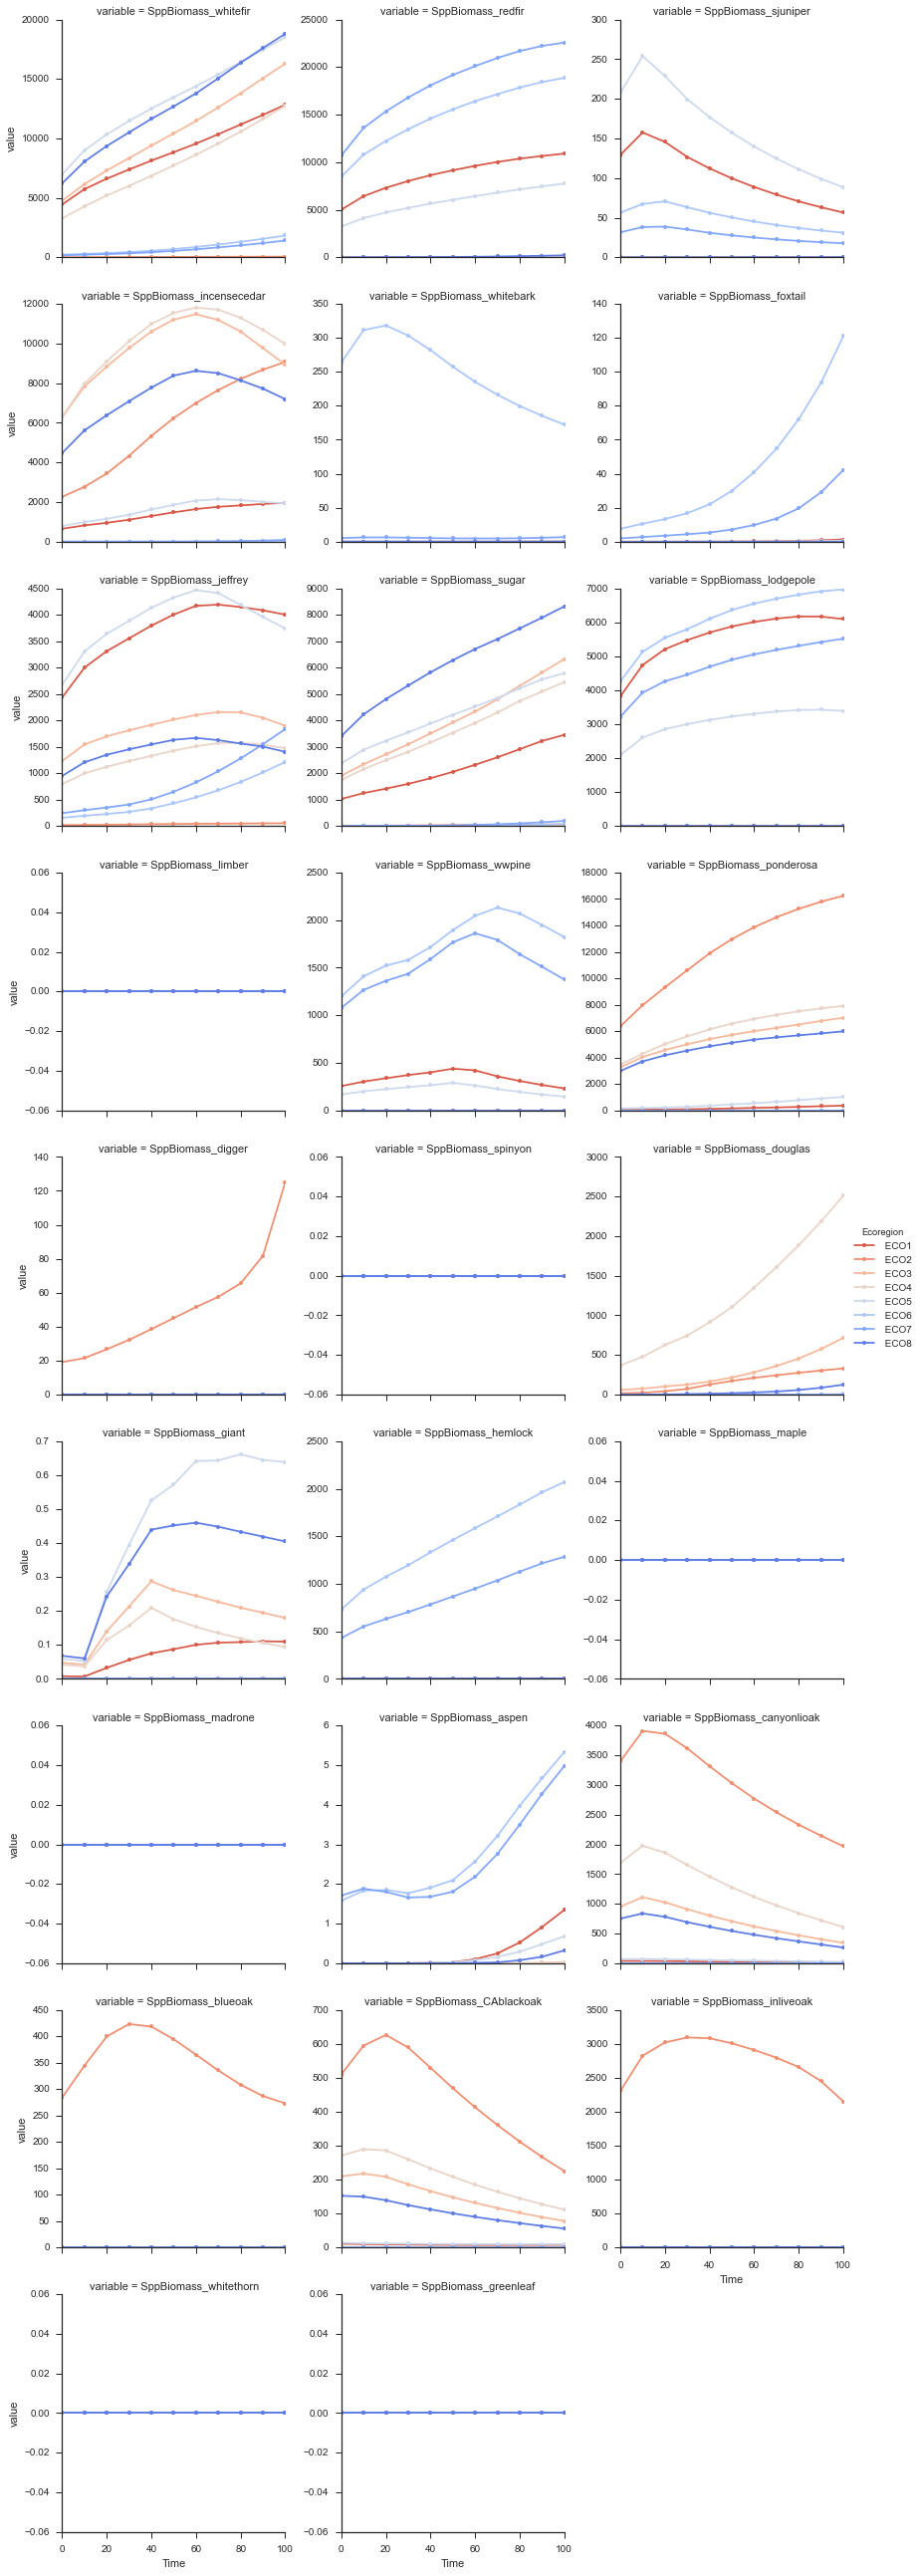

In [100]:
# Four simulations, with various initial ecoregion parameters
# Each simulation sets identical parameters across all ecoregions
# Each simulations increases 

#sim4bio = pd.read_csv(wrkDir + 'param_set_4/output/DinkeyScenario/replicate1/spp-biomass-log.csv')

# Remove the frass columns
del sim4bio['NumSites']
del sim4bio['EcoregionIndex']
del sim4bio['Unnamed: 30']

# Melt by time and ecoregion (make a biomass column)
sim4biomass = pd.melt(sim4bio, id_vars=['Time','Ecoregion'])

# Oddly enough, LANDIS outputs bad data as ' NaN' with the preceeding space
# Take care of that and correct the column dtype for plotting
sim4biomass[sim4biomass.value == ' NaN'] = np.nan
sim4biomass = sim4biomass.dropna()
sim4biomass.value = sim4biomass.value.astype(float)

# ggplot style facets to look at biomass over time as a function of ecoregion
# and species
sns.set(style="ticks")
grid = sns.FacetGrid(sim4biomass, col="variable", hue="Ecoregion", 
                     col_wrap=3, size=4, palette = 'coolwarm_r', sharey = False)
grid.map(plt.plot, "Time", "value", marker="o", ms=4)
grid.add_legend();


In [176]:
# Data managment to concatenate all the runs data, for plotting later on
sim1biomass['SIM'] = 1
sim2biomass['SIM'] = 2
sim3biomass['SIM'] = 3
sim4biomass['SIM'] = 4

frames = [sim1biomass, sim2biomass,
          sim3biomass, sim4biomass]
simsBiomass = pd.concat(frames)
simsBiomass['EcoInt'] = 0
idx = 1
for eco in np.unique(simsBiomass.Ecoregion):
    simsBiomass.EcoInt[simsBiomass.Ecoregion == eco] = idx
    idx = idx + 1
t0biomass = simsBiomass[simsBiomass.Time == 0]

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


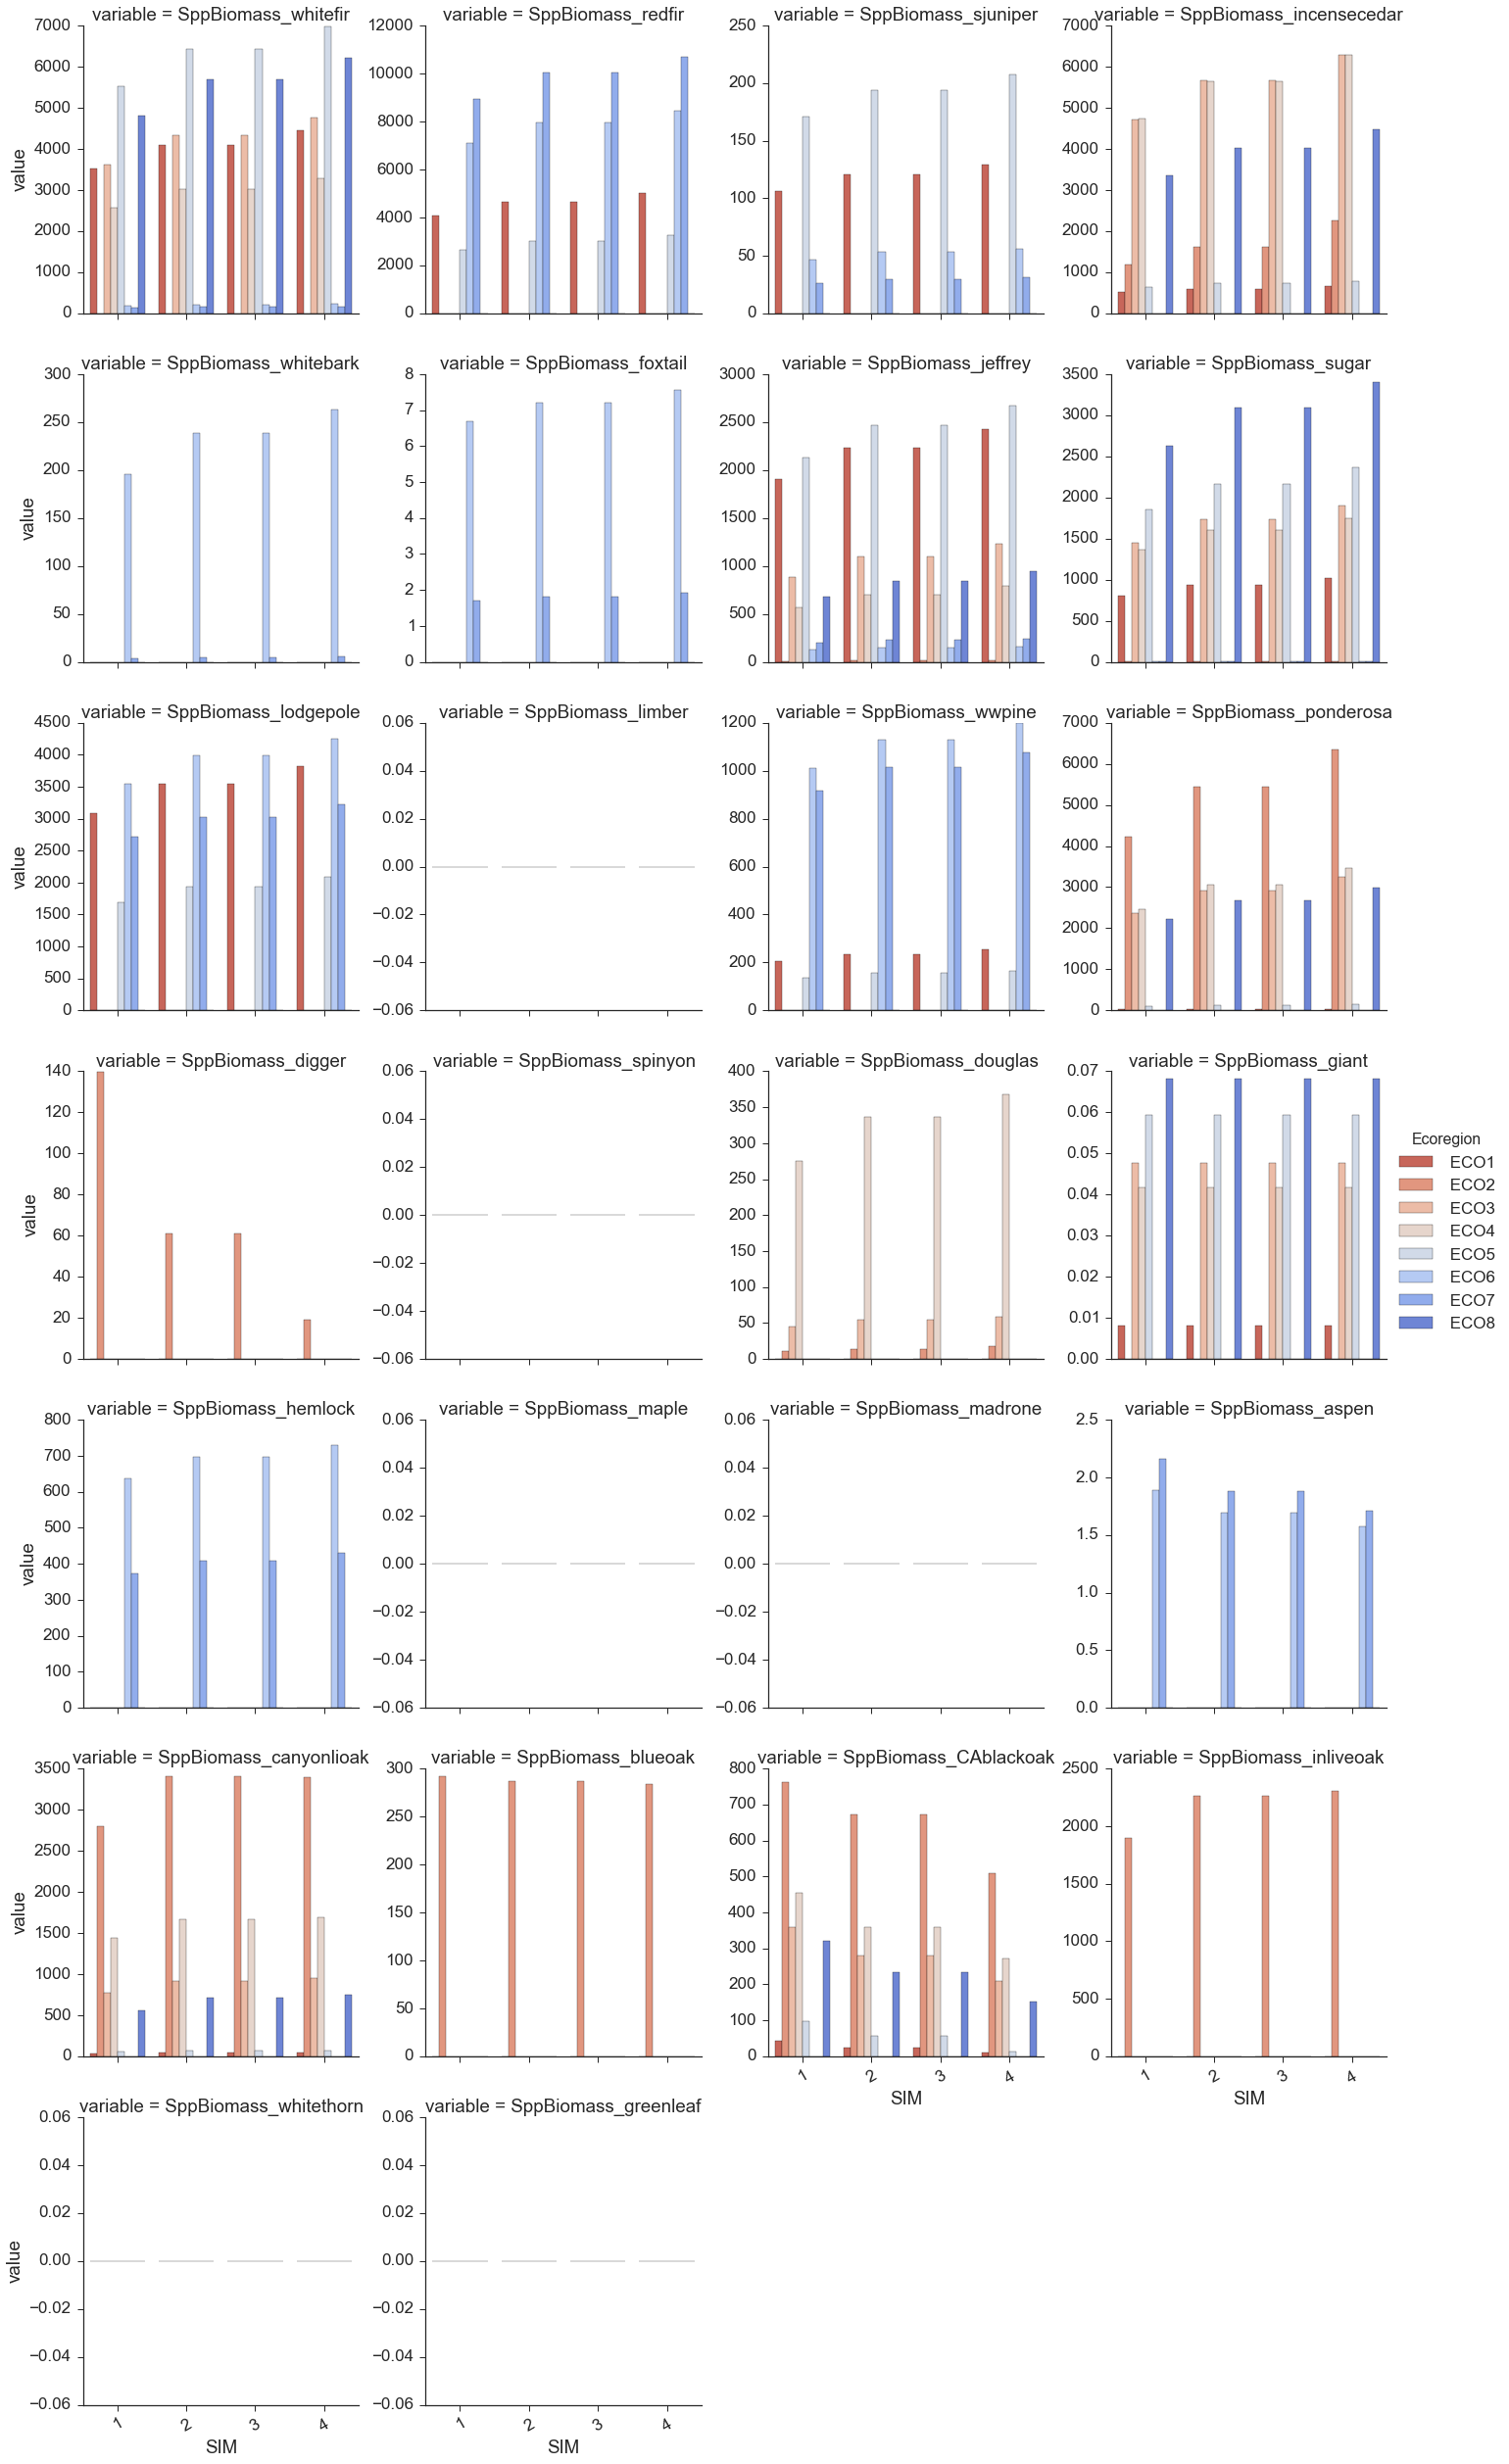

In [222]:
# Create some summary barcharts of t0 biomass by species, ecoregion, and simulation
sns.set_context("notebook", font_scale=1.7, rc={"lines.linewidth": 2.5})
g = sns.factorplot(x="SIM", y="value", hue="Ecoregion",
               col="variable", data=t0biomass, kind="bar",
               col_wrap = 4, size = 5, sharey = False,
               palette = 'coolwarm_r');
g.set_xticklabels(rotation=30)